# **CO2 Emissions Prediction: Data Preprocessing**

**Author:** Cynthia Francis  
---

## 📌 Project Scope

This notebook is part of a project that aims to build a predictive model for **CO2 emissions of cars** sold in France in 2014.  
The dataset includes:
- Fuel consumption
- CO2 emissions
- Air pollutant emissions (as per Euro standard)
- Vehicle technical characteristics (brand, model, engine type, etc.)

The goal of this notebook is to:
- Download or load the dataset
- Perform initial exploration
- Clean and preprocess the data for modeling

# 📊 Dataset Overview

As part of this project, I downloaded the dataset:

**📁 Title:**  
**[2014] Emissions de polluants, CO2 et caractéristiques des véhicules commercialisés en France**

📍 Available on [data.gouv.fr](https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/)  
📄 Accompanied by a variable dictionary: **Dictionnaire des variables**  
🔓 License: [Etalab Open License](https://www.etalab.gouv.fr/wp-content/uploads/2014/05/Licence_Ouverte.pdf)

---

## 🗂️ Source and Context

The data comes from the **vehicle approval services of automobile manufacturers**.

ADEME (the French Agency for Ecological Transition) acquires the data from the  
**Union Technique de l’Automobile, du Motocycle et du Cycle (UTAC)**,  
which is responsible for the approval of vehicles before they are released on the market.  
This process is carried out in collaboration with the **Ministry of Sustainable Development**.

---

## 🔍 What the Dataset Includes

For each vehicle, the original data provided by UTAC includes:

- **Fuel consumption**
- **Carbon dioxide (CO₂) emissions**
- **Air pollutant emissions**, regulated under the **Euro standard**
- **Complete technical specifications** of the vehicle, such as:
  - Vehicle range
  - Brand and model
  - CNIT number (unique vehicle ID)
  - Type of energy/fuel used (e.g., diesel, petrol, electric)

---

This dataset provides a rich basis for building a predictive model of CO₂ emissions and exploring the environmental impact of vehicle characteristics in the French car market.

In [1]:
# ----------------------------------------
# 📥 Import necessary libraries
# ----------------------------------------
import pandas as pd

# ----------------------------------------
# 📂 Load the French car emissions dataset and its dictionary
# ----------------------------------------
# - sep=';' because the CSV uses semicolon delimiters (common in French-format CSVs)
# - encoding='latin1' handles French special characters (accents, etc.)
cars_df = pd.read_csv('../data/mars-2014-complete.csv', sep=';', encoding='latin1')
dictionary_df = pd.read_excel('../data/carlab-annuaire-variable.xlsx')

# ----------------------------------------
# 👀 Preview the datasets
# ----------------------------------------
display(cars_df.head())
display(dictionary_df.head())




,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


,nom-colonne,typerubrique,longueur,légende,unité
0,lib_mrq_utac,varchar,12,la marque,NaN
1,lib_mod_doss,varchar,20,le modele du dossier,NaN
2,lib_mod,varchar,20,le modèle commercial,NaN
3,dscom,varchar,91,la désignation commerciale,NaN
4,cnit,varchar,15,le Code National d'Identification du Type (CNIT),NaN



# Variable Glossary 

## 🚘 Vehicle Identification

| Column Name       | Description                         |
|-------------------|-------------------------------------|
| `lib_mrq_utac`    | Brand (e.g., Renault, Peugeot)      |
| `lib_mod_doss`    | Model name (e.g., Clio, 208)        |
| `lib_mod`         | Commercial model name               |
| `dscom`           | Commercial description              |
| `cnit`            | CNIT code: official vehicle type identifier in France |
| `tvv`             | Vehicle type/version code           |
| `cod_cbr`         | Fuel type (e.g., diesel, petrol)    |
| `gamme`           | Vehicle range/class (compact, SUV)  |
| `Carrosserie`     | Body type (sedan, hatchback, etc.)  |

---

## ⚡ Power & Engine

| Column Name         | Description                                      |
|---------------------|--------------------------------------------------|
| `hybride`           | Whether the car is a hybrid (O/N)                |
| `puiss_admin_98`    | Administrative power (used for taxes)           |
| `puiss_max`         | Maximum power (in kilowatts)                     |
| `typ_boite_nb_rapp` | Gearbox type and number of gears                 |

---

## ⛽ Fuel Consumption

| Column Name     | Description                                  |
|-----------------|----------------------------------------------|
| `conso_urb`     | Urban fuel consumption (L/100 km)            |
| `conso_exurb`   | Extra-urban fuel consumption (L/100 km)      |
| `conso_mixte`   | Combined (average) fuel consumption (L/100 km) |

---

## 🌍 Pollution & Emissions

| Column Name  | Description                          |
|--------------|--------------------------------------|
| `co2`        | CO₂ emissions (g/km)                 |
| `co_typ_1`   | CO type I emissions (g/km)           |
| `hc`         | Hydrocarbon emissions (g/km)         |
| `nox`        | Nitrogen oxide emissions (g/km)      |
| `hcnox`      | Combined HC + NOx emissions (g/km)   |
| `ptcl`       | Particle emissions (g/km)            |

---

## ⚖️ Weight

| Column Name       | Description                       |
|-------------------|-----------------------------------|
| `masse_ordma_min` | Minimum curb weight (kg)          |
| `masse_ordma_max` | Maximum curb weight (kg)          |

---

## 🧾 Registration / Metadata

| Column Name  | Description                                                        |
|--------------|--------------------------------------------------------------------|
| `champ_v9`   | Field containing EURO emissions standard info                      |
| `date_maj`   | Last update date                                                   |


In [2]:
# ----------------------------------------
# 👀 Display dataset info
# ----------------------------------------
print(cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

In [3]:
# ----------------------------------------
# 👀 Remove empty columns 26 to 29 
# ----------------------------------------
cars_df.drop(labels=['Unnamed: 27', 'Unnamed: 26', 'Unnamed: 28', 'Unnamed: 29'], axis=1, inplace=True)
display(cars_df.head())

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,hc,nox,hcnox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


# Data Exploration

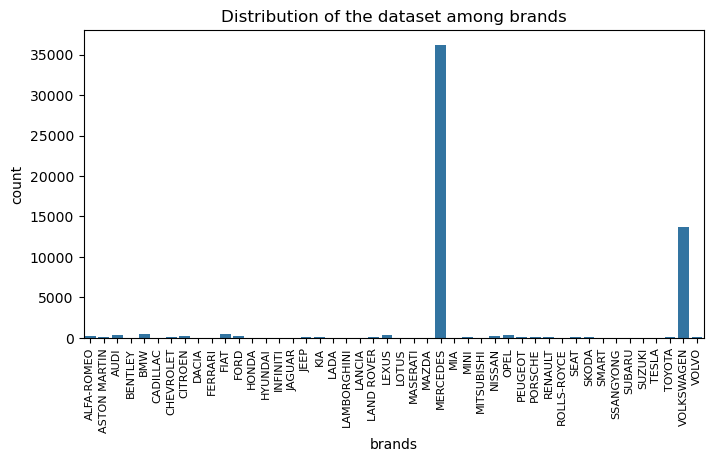

In [4]:
# ----------------------------------------  
# Feature Observation
# ----------------------------------------  

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of samples among car brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars_df, x=cars_df.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()


🔎 We can clearly observe that **MERCEDES** and **VOLKSWAGEN** are overrepresented in the dataset.  To better understand this overrepresentation, let’s first **zoom in on MERCEDES** and explore the distribution of its vehicles.


In [5]:
# Display type of cars represented for Mercedes
print('Distribution within MERCEDES samples')
print(cars_df.Carrosserie[cars_df.lib_mrq == 'MERCEDES'].value_counts())
print('\n')

# display unique MERCEDES commercial model and CNIT codes
print('# of unique commercial model: {}'.format(cars_df.dscom[cars_df.lib_mrq == 'MERCEDES'].nunique()))
print('# of unique CNIT code: {}'.format(cars_df.cnit[cars_df.lib_mrq == 'MERCEDES'].nunique()))

Distribution within MERCEDES samples
Carrosserie
MINIBUS                32076
BERLINE                 2154
BREAK                    685
COUPE                    443
TS TERRAINS/CHEMINS      402
CABRIOLET                268
MONOSPACE COMPACT        180
COMBISPACE                12
Name: count, dtype: int64


# of unique commercial model: 305
# of unique CNIT code: 36208


It appears that MERCEDES registered many different versions for what seem to be similar models. These versions likely share the same characteristics, resulting in duplicated rows within the dataset.

In [6]:
# Remove columns with identical or redundant information
cars_df.drop(labels=['cnit', 'tvv'], axis=1, inplace=True)

# Count the number of duplicated rows in the dataset
print('Number of duplicated rows:')
print(cars_df.duplicated().value_counts())


Number of duplicated rows:
True     46406
False     8638
Name: count, dtype: int64


As expected, we found duplicated rows in the dataset. It appears that this issue is not unique to Mercedes, so let's proceed to remove all duplicate entries.

<class 'pandas.core.frame.DataFrame'>
Index: 8638 entries, 0 to 55043
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            8638 non-null   object 
 1   lib_mod_doss       8638 non-null   object 
 2   lib_mod            8638 non-null   object 
 3   dscom              8638 non-null   object 
 4   cod_cbr            8638 non-null   object 
 5   hybride            8638 non-null   object 
 6   puiss_admin_98     8638 non-null   int64  
 7   puiss_max          8638 non-null   object 
 8   typ_boite_nb_rapp  8638 non-null   object 
 9   conso_urb          8604 non-null   object 
 10  conso_exurb        8604 non-null   object 
 11  conso_mixte        8613 non-null   object 
 12  co2                8613 non-null   float64
 13  co_typ_1           8533 non-null   object 
 14  hc                 3485 non-null   object 
 15  nox                8533 non-null   object 
 16  hcnox              5078 non-

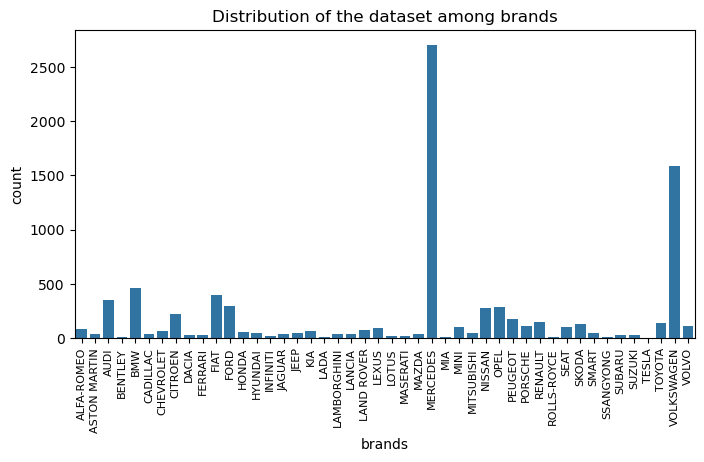

In [7]:
# Remove duplicate rows
cars_df.drop_duplicates(inplace=True)

# Check the new dataset 
print(cars_df.info())

# Plot again the distribution of samples among brands
fig = plt.figure(figsize=(8, 4))
sns.countplot(data=cars_df, x=cars_df.lib_mrq)
plt.xticks(rotation=90, size=8)
plt.xlabel('brands')
plt.title('Distribution of the dataset among brands')
plt.show()

The dataset now has a more balanced distribution across brands, although Mercedes and Volkswagen are still more prominently represented.

In [8]:
# Convert some columns to floats
col_to_convert = ['puiss_max', 'conso_urb', 'conso_exurb', 'conso_mixte']
for col in col_to_convert:
    cars_df[col] = cars_df[col].str.replace(',', '.').astype('float')

# Check the modification
print(cars_df[col_to_convert].head())
print('\n')
print(cars_df[col_to_convert].info())

   puiss_max  conso_urb  conso_exurb  conso_mixte
0      147.0       11.3          5.8          7.8
1      147.0       11.5          6.0          8.0
2      100.0        6.6          4.2          5.1
4      125.0        6.9          4.3          5.3
6      125.0        6.6          4.3          5.1


<class 'pandas.core.frame.DataFrame'>
Index: 8638 entries, 0 to 55043
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   puiss_max    8638 non-null   float64
 1   conso_urb    8604 non-null   float64
 2   conso_exurb  8604 non-null   float64
 3   conso_mixte  8613 non-null   float64
dtypes: float64(4)
memory usage: 337.4 KB
None


Since this analysis focuses on CO₂ emissions, we can drop columns related to other measurements as well as date information.

In [9]:
# Remove extraneous measurement and date columns
col_to_remove = ['co_typ_1', 'hc', 'nox', 'hcnox', 'ptcl', 'date_maj']
cars_df.drop(labels=col_to_remove, axis=1, inplace=True)

In [10]:
# Count how many rows have at least one missing value (before removal)
missing_row_count = cars_df.isnull().any(axis=1).sum()
print(f'Number of rows with missing values before removal: {missing_row_count}')


Number of rows with missing values before removal: 42


There are 42 rows in the dataset with missing values. Since this is a relatively small number compared to the overall dataset size (8638), we will remove these rows to ensure the data is complete for our analysis.

In [11]:
# Remove rows with missing values
cars_df.dropna(inplace=True)

# Check the resulting dataframe
display(cars_df.head(2))
print(cars_df.info())


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER


<class 'pandas.core.frame.DataFrame'>
Index: 8596 entries, 0 to 55043
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            8596 non-null   object 
 1   lib_mod_doss       8596 non-null   object 
 2   lib_mod            8596 non-null   object 
 3   dscom              8596 non-null   object 
 4   cod_cbr            8596 non-null   object 
 5   hybride            8596 non-null   object 
 6   puiss_admin_98     8596 non-null   int64  
 7   puiss_max          8596 non-null   float64
 8   typ_boite_nb_rapp  8596 non-null   object 
 9   conso_urb          8596 non-null   float64
 10  conso_exurb        8596 non-null   float64
 11  conso_mixte        8596 non-null   float64
 12  co2                8596 non-null   float64
 13  masse_ordma_min    8596 non-null   int64  
 14  masse_ordma_max    8596 non-null   int64  
 15  champ_v9           8596 non-null   object 
 16  Carrosserie        8596 non-

### Numerical Features

count    8596.000000
mean      176.013378
std        49.883076
min        48.000000
25%       135.000000
50%       181.000000
75%       209.000000
max       572.000000
Name: co2, dtype: float64

Car(s) with the lowest CO2 emissions:


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
55014,VOLVO,V60 HYBRID,V60,V60 PLUG-IN HYBRID D6 Geartronic 6 AWD,GL,oui,10,158.0,A 6,0.0,5.5,1.8,48.0,1949,1949,715/2007*459/2012EURO5,BREAK,SUPERIEURE



Car(s) with the highest CO2 emissions:


,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,puiss_max,typ_boite_nb_rapp,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme
197,ASTON MARTIN,ONE-77,ONE-77,ONE-77,ES,non,81,559.299988,A 6,41.099998,14.9,24.5,572.0,1815,1815,715/2007*692/2008EURO5,COUPE,LUXE


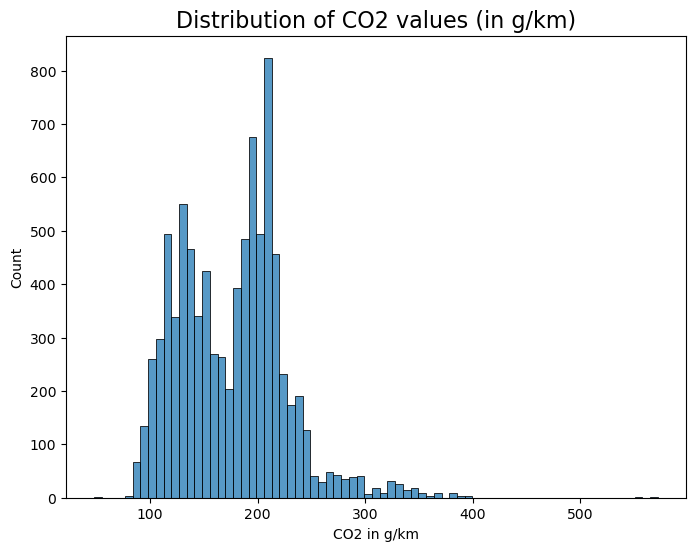

In [12]:
# Let's start by exploring the target variable, 'co2'

# Plot the distribution of CO2 emissions
plt.figure(figsize=(8, 6))
sns.histplot(data=cars_df, x='co2')
plt.xlabel('CO2 in g/km')
plt.title('Distribution of CO2 values (in g/km)', size=16)

# Display descriptive statistics for CO2 emissions
print(cars_df.co2.describe())

# Display car) with the lowest CO2 emissions in the dataset
print('\nCar(s) with the lowest CO2 emissions:')
display(cars_df[cars_df.co2 == cars_df.co2.min()])

# Display car with the highest CO2 emissions in the dataset
print('\nCar(s) with the highest CO2 emissions:')
display(cars_df[cars_df.co2 == cars_df.co2.max()])
print('\n')


This distribution is clearly bimodal, indicating two main groups of vehicles—one with CO₂ emissions centered around 140g/km and another around 200g/km. There are also a few noticeable outliers with much higher emissions. Next, we will explore how CO₂ values correlate with other features in the dataset by plotting a heatmap.

array([[<Axes: title={'center': 'puiss_admin_98'}>,
        <Axes: title={'center': 'puiss_max'}>,
        <Axes: title={'center': 'conso_urb'}>],
       [<Axes: title={'center': 'conso_exurb'}>,
        <Axes: title={'center': 'conso_mixte'}>,
        <Axes: title={'center': 'co2'}>],
       [<Axes: title={'center': 'masse_ordma_min'}>,
        <Axes: title={'center': 'masse_ordma_max'}>, <Axes: >]],
      dtype=object)

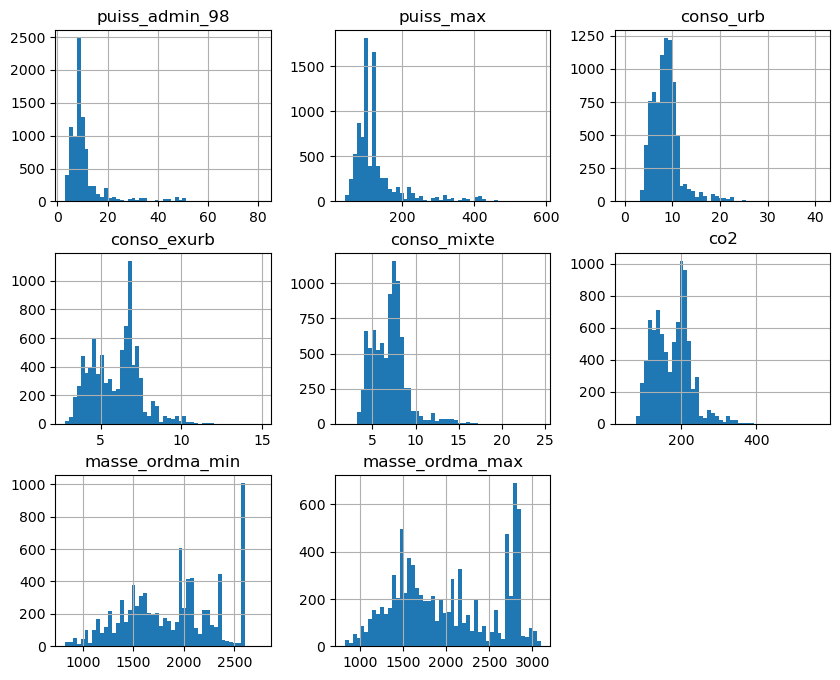

In [13]:
cars_df.hist(figsize=(10,8),bins=50)

Most vehicles in the dataset are mid-sized, moderately powered, and have average to good fuel efficiency

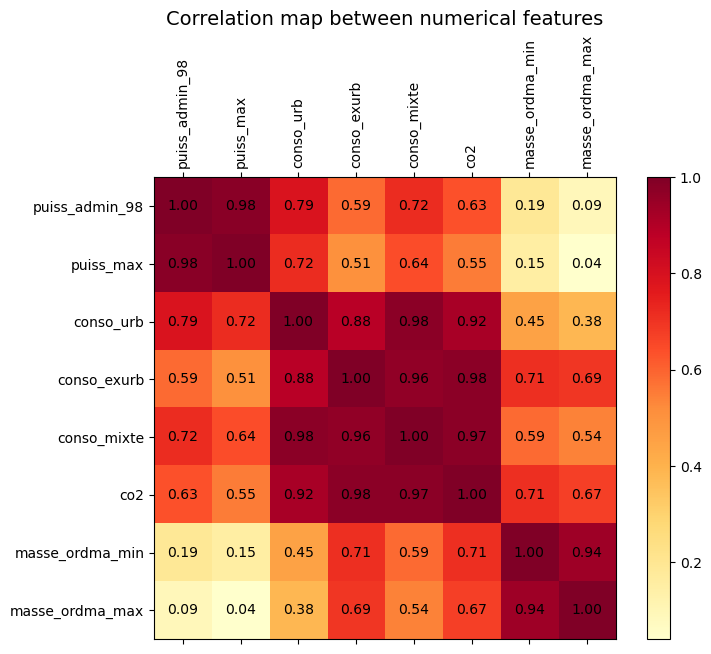

In [14]:
import numpy as np

# Select only numeric columns for correlation
numeric_df = cars_df.select_dtypes(include=[np.number])

# Plot the correlation map
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(numeric_df.corr(), cmap=plt.cm.YlOrRd)

# Display the correlation factors on the plot
for (x, y), value in np.ndenumerate(numeric_df.corr()):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")

# Set ticks and title
ax.set_xticks(range(len(numeric_df.columns)))
ax.set_xticklabels(numeric_df.columns, rotation=90)
ax.set_yticks(range(len(numeric_df.columns)))
ax.set_yticklabels(numeric_df.columns)
plt.title('Correlation map between numerical features', size=14)

plt.colorbar(cax)
plt.show()


If we focus on CO₂, we observe that it shows a generally strong correlation with all other features, which is promising for building a predictive model. Additionally, some features are highly correlated with one another. For instance:

‘masse_ordma_min’ and ‘masse_ordma_max’ have a correlation of 0.94,

‘puiss_admin_98’ and ‘puiss_max’ are correlated at 0.98,

‘conso_mixte’ is strongly correlated with both ‘conso_urb’ (0.98) and ‘conso_exurb’ (0.96).

These high correlations are expected based on the feature descriptions. Given this redundancy, we can consider removing some of the highly correlated features to improve readability and avoid multicollinearity.

In [15]:
# Remove columns with high correlation between other features
col_high_corr_to_remove = ['masse_ordma_max', 'puiss_max', 'conso_mixte']
cars_df.drop(labels=col_high_corr_to_remove, axis=1, inplace=True)

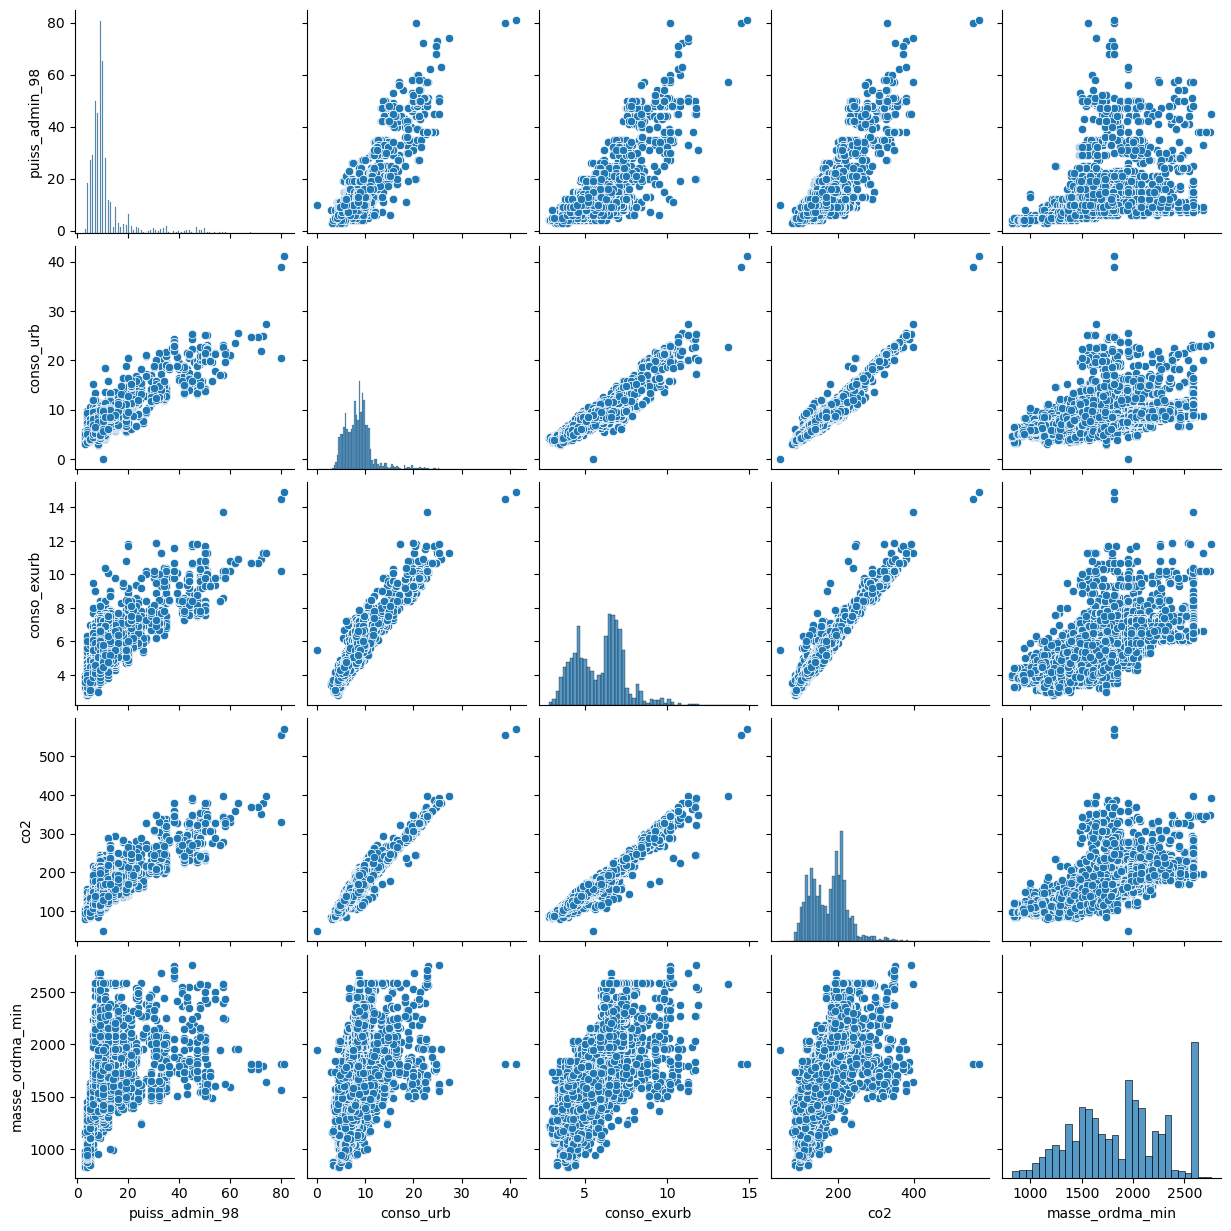

In [16]:
# Plot a pairplot to have an overview of all the numerical features
sns.pairplot(cars_df)
plt.show()

As shown in the correlation map and by looking at the plots, CO₂ is well correlated with several features in our dataset.

### Categorical Features

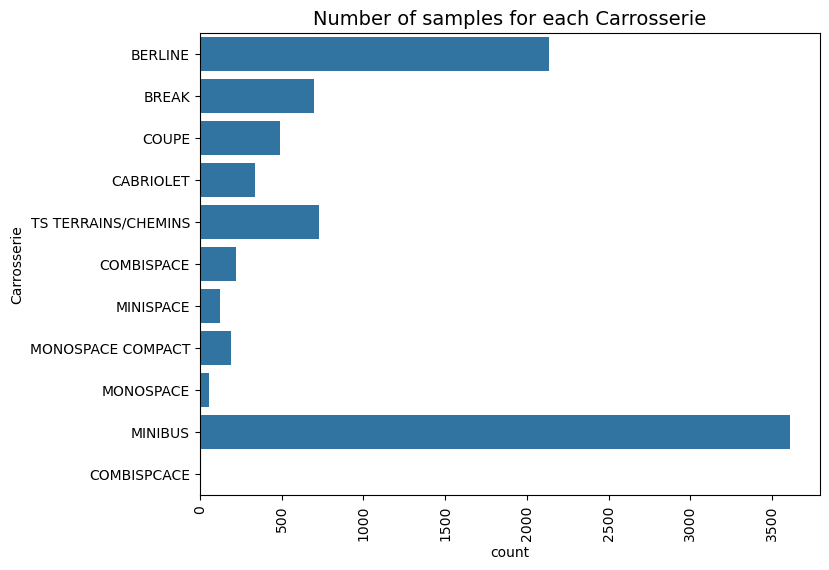

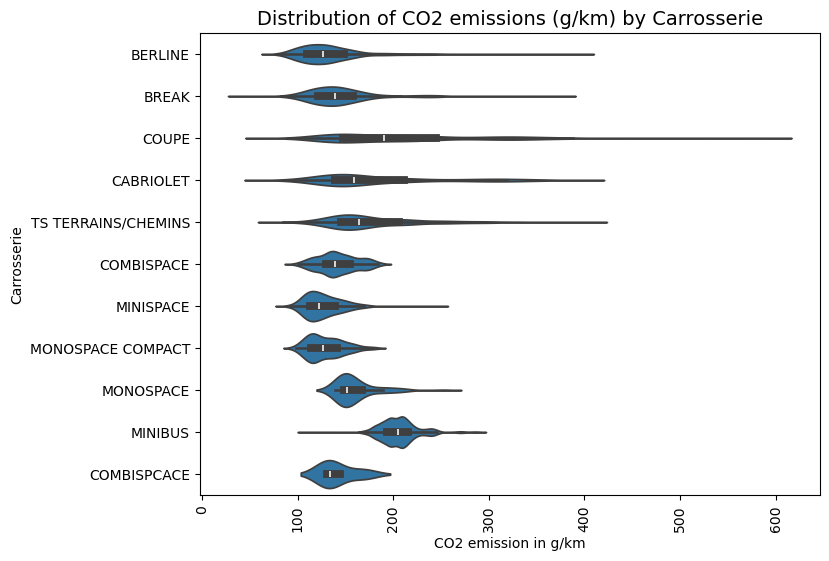

In [17]:
# Plot the sample count for each vehicle body type ("Carrosserie")
plt.figure(figsize=(8,6))
sns.countplot(data=cars_df, y='Carrosserie')
plt.xticks(rotation=90)
plt.title('Number of samples for each Carrosserie', size=14)
plt.show()

# Plot the distribution of CO2 emissions for each body type
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df, y='Carrosserie', x='co2')
plt.title('Distribution of CO2 emissions (g/km) by Carrosserie', size=14)
plt.xlabel('CO2 emission in g/km')
plt.xticks(rotation=90)
plt.show()


From the count plot, it’s evident that the MINIBUS and BERLINE categories are overrepresented in our dataset, while others, such as COMBISPACE, are noticeably underrepresented. The violin plot demonstrates that body type (“Carrosserie”) has an impact on CO₂ emissions: MINIBUS vehicles show the highest average emissions, around 200g/km, whereas BERLINE cars cluster around 140g/km, though some outliers reach as high as 400g/km. For categories with only a few samples, such as COMBISPACE, it’s difficult to draw reliable conclusions about their emission profiles.

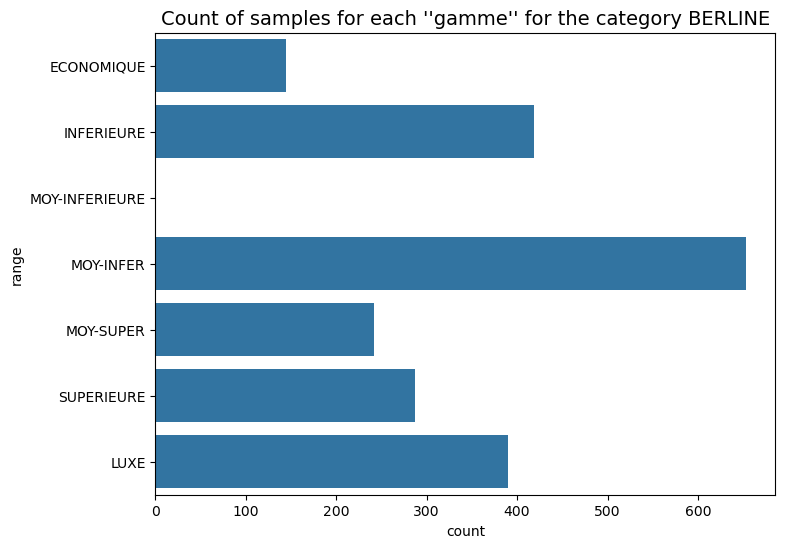

In [18]:
# Check the 'gamme' (range) while zooming in on a given 'Carrosserie' 
plt.figure(figsize=(8, 6))
sns.countplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], y='gamme', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.title('Count of samples for each \'\'gamme\'\' for the category BERLINE', size=14)
plt.ylabel('range')
plt.show()

MOY-INFER and MOY-INFERIEURE are the same, so we merge them.
All the range categories are well represented in BERLINE, so we can easily compare them regarding to CO2 emissions.

In [19]:
# Merge MOY-INFER and MOY-INFERIEURE 
cars_df['gamme'] = cars_df['gamme'].str.replace('MOY-INFERIEURE', 'MOY-INFER')
print(cars_df['gamme'].unique())

['MOY-SUPER' 'LUXE' 'MOY-INFER' 'INFERIEURE' 'SUPERIEURE' 'ECONOMIQUE']


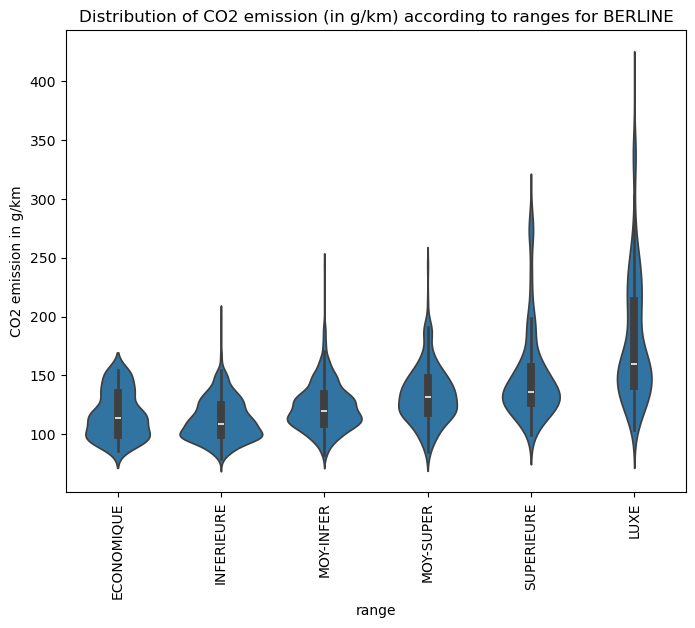

In [20]:
# Plot co2 distribution as a function of 'gamme' (range)
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], x='gamme', y='co2', order=['ECONOMIQUE', 'INFERIEURE', 'MOY-INFER', 'MOY-SUPER', 'SUPERIEURE', 'LUXE'])
plt.xticks(rotation=90)
plt.title('Distribution of CO2 emission (in g/km) according to ranges for BERLINE')
plt.xlabel('range')
plt.ylabel('CO2 emission in g/km')
plt.show()

We can see that, for a given Carrosserie (BERLINE), the CO2 emission increases when range increase.
LUXE category has an average of 150g/km and ECONOMIQUE and INFERIEURE around 115g/km.
LUXE has also a really wide distribution with outliers up to 400 g/km of CO2.

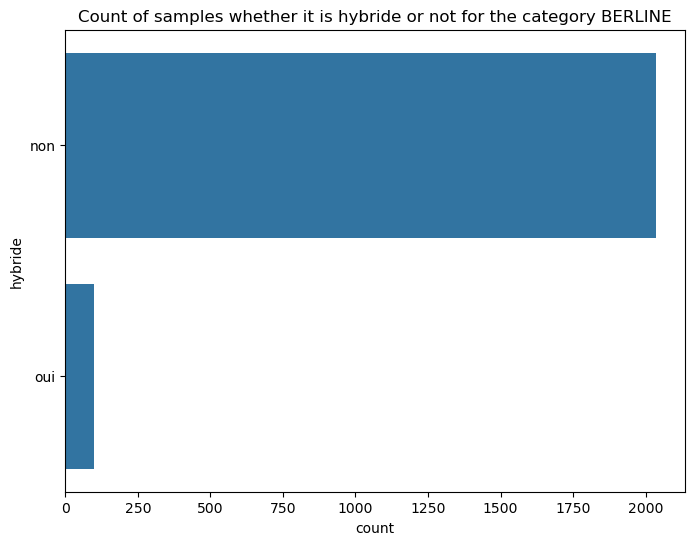

In [21]:
# Look at the 'hybride' feature for BERLINE
plt.figure(figsize=(8, 6))
sns.countplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], y='hybride')
plt.title('Count of samples whether it is hybride or not for the category BERLINE', size=12)
plt.show()

We don't have many BERLINE hybrid cars in our dataset.

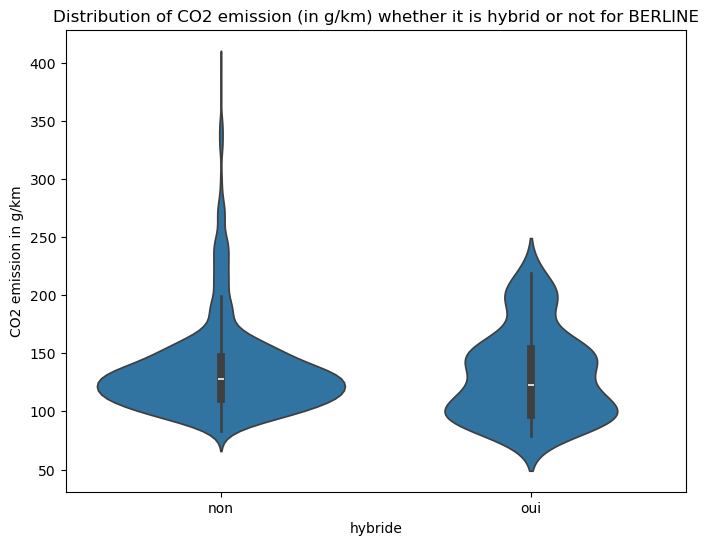

In [22]:
# Plot co2 distribution whether it is hybrid or not for BERLINE 
plt.figure(figsize=(8,6))
sns.violinplot(data=cars_df[cars_df.Carrosserie == 'BERLINE'], x='hybride', y='co2')
plt.title('Distribution of CO2 emission (in g/km) whether it is hybrid or not for BERLINE')
plt.ylabel('CO2 emission in g/km')
plt.show()

It appears that the average CO₂ emissions for BERLINE vehicles are similar regardless of whether they are hybrid or non-hybrid. However, we should be cautious in interpreting this result, as the number of hybrid samples is much smaller compared to non-hybrids.

In [23]:
cars_df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cod_cbr,hybride,puiss_admin_98,typ_boite_nb_rapp,conso_urb,conso_exurb,co2,masse_ordma_min,champ_v9,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,M 6,11.3,5.8,182.0,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,M 6,11.5,6.0,186.0,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,M 6,6.6,4.2,134.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,M 6,6.9,4.3,139.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER
6,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,M 6,6.6,4.3,136.0,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER


# Data Preprocessing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import make_scorer, r2_score
from joblib import parallel_backend

In [25]:
# Target and features
target = "co2"
features = [
    'lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
    'puiss_admin_98', 'typ_boite_nb_rapp', 'conso_urb', 'conso_exurb',
    'masse_ordma_min', 'champ_v9', 'Carrosserie', 'gamme'
]
X = cars_df[features]
y =cars_df[target]

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Column types and preprocessing (unchanged)
numeric_features = ['puiss_admin_98', 'conso_urb', 'conso_exurb', 'masse_ordma_min']
categorical_features = list(set(features) - set(numeric_features))

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scorer = make_scorer(r2_score)


Starting Grid Search for Lasso...
Best params for Lasso: {'model__alpha': 0.01}
Best CV R2 for Lasso: 0.9977
Test R2 for Lasso: 0.9978
Test RMSE for Lasso: 2.4045
Starting Grid Search for Ridge...
Best params for Ridge: {'model__alpha': 0.1}
Best CV R2 for Ridge: 0.9983
Test R2 for Ridge: 0.9989
Test RMSE for Ridge: 1.6635
Starting Grid Search for RandomForest...
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
Best CV R2 for RandomForest: 0.9947
Test R2 for RandomForest: 0.9986
Test RMSE for RandomForest: 1.8962
Starting Grid Search for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best CV R2 for XGBoost: 0.9903
Test R2 for XGBoost: 0.9930
Test RMSE for XGBoost: 4.2615
          Model  Best CV R2   Test R2  Test RMSE  \
0         Lasso    0.997654  0.997756   2.404497   
1         Ridge    0.998330  0.998926   1.663464   
2  RandomForest    0.994650  0.998605   1.896158   
3       

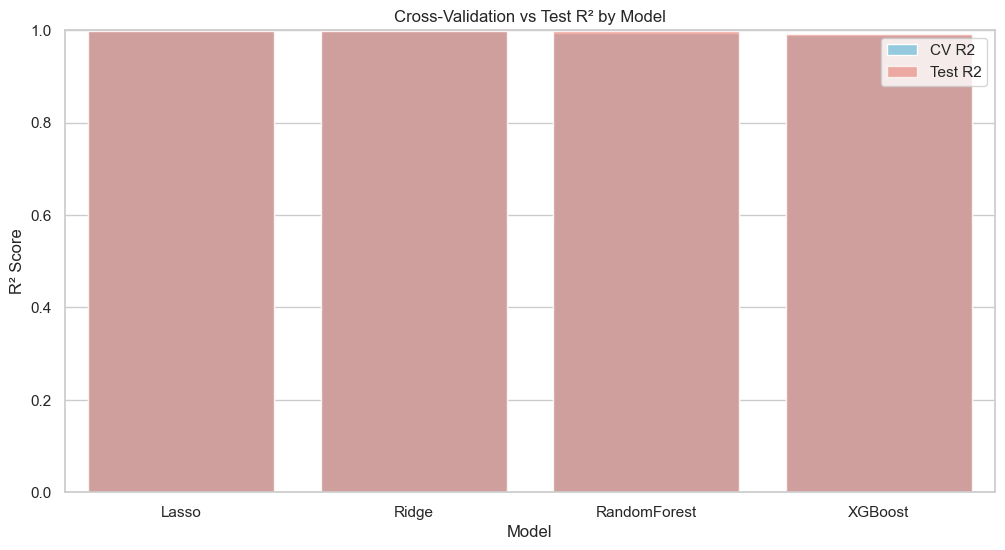

In [26]:
model_params = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'model__alpha': [0.01, 0.1, 1]}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [None, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [3],
            'model__learning_rate': [0.1]
        }
    }
}

results = []

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"Starting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)  # FIT ONLY on train set

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    y_pred_test = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


    print(f"Test R2 for {name}: {test_r2:.4f}")
    print(f"Test RMSE for {name}: {test_rmse:.4f}")

    results.append({
        'Model': name,
        'Best CV R2': grid.best_score_,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Best Params': grid.best_params_
    })

# Show all results
results_df = pd.DataFrame(results)
print(results_df)

# Plot CV vs Test R2 for all models
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")
sns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")
plt.title("Cross-Validation vs Test R² by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.legend()
plt.show()


Starting Grid Search for Lasso...
Best params for Lasso: {'model__alpha': 0.01}
Best CV R2 for Lasso: 0.9977
Test R2 for Lasso: 0.9978
Test RMSE for Lasso: 2.4045

Top 10 most influential predictors for Lasso (by absolute coefficient):
cat__cod_cbr_FE               75.773272
cat__cod_cbr_GP/ES            50.369578
cat__cod_cbr_GN               35.755151
num__conso_urb                25.025155
num__conso_exurb              24.875717
cat__cod_cbr_GN/ES            23.786994
cat__cod_cbr_GO               17.692850
cat__cod_cbr_GH               11.131822
cat__lib_mod_doss_GALLARDO     3.547993
cat__Carrosserie_MINIBUS       3.531779
dtype: float64


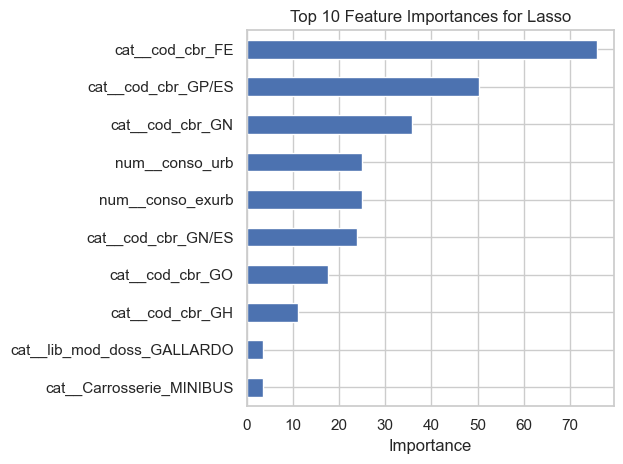


Starting Grid Search for Ridge...
Best params for Ridge: {'model__alpha': 0.1}
Best CV R2 for Ridge: 0.9983
Test R2 for Ridge: 0.9989
Test RMSE for Ridge: 1.6635

Top 10 most influential predictors for Ridge (by absolute coefficient):
cat__cod_cbr_FE                                                     55.610947
cat__cod_cbr_GO                                                     41.022071
cat__cod_cbr_GP/ES                                                  33.376774
cat__dscom_SPRINTER 316 GNV                                         33.255697
num__conso_urb                                                      25.977910
num__conso_exurb                                                    25.491176
cat__cod_cbr_ES                                                     24.267138
cat__cod_cbr_ES/GP                                                  24.145145
cat__cod_cbr_GN                                                     23.527555
cat__dscom_GRAND CHEROKEE (2012) 3.6 L V6 PENTASTAR FLEXFUEL B

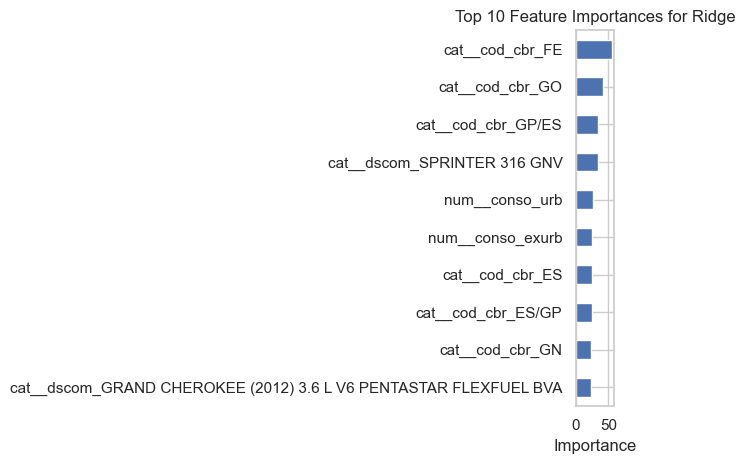


Starting Grid Search for RandomForest...
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
Best CV R2 for RandomForest: 0.9947
Test R2 for RandomForest: 0.9986
Test RMSE for RandomForest: 1.8962

Top 10 most influential predictors for RandomForest (by feature importance):
num__conso_exurb            0.906780
num__conso_urb              0.071731
cat__cod_cbr_GO             0.003168
num__masse_ordma_min        0.003022
num__puiss_admin_98         0.002471
cat__cod_cbr_GP/ES          0.002134
cat__lib_mod_doss_ONE-77    0.001226
cat__cod_cbr_ES             0.001041
cat__dscom_ONE-77           0.000901
cat__cod_cbr_GN/ES          0.000658
dtype: float64


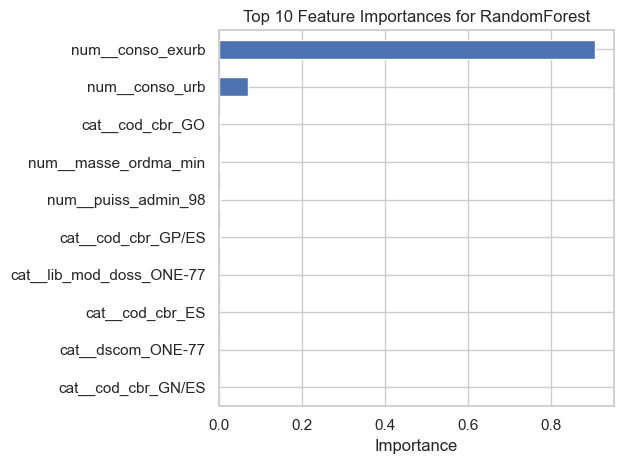


Starting Grid Search for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best CV R2 for XGBoost: 0.9903
Test R2 for XGBoost: 0.9930
Test RMSE for XGBoost: 4.2615

Top 10 most influential predictors for XGBoost (by feature importance):
num__conso_exurb                     0.737005
num__conso_urb                       0.117945
num__masse_ordma_min                 0.031246
cat__cod_cbr_GO                      0.020920
cat__cod_cbr_GP/ES                   0.017058
cat__typ_boite_nb_rapp_M 5           0.015431
cat__cod_cbr_FE                      0.012257
num__puiss_admin_98                  0.011375
cat__dscom_SPRINTER COMBI 319 CDI    0.007547
cat__cod_cbr_ES                      0.005656
dtype: float32


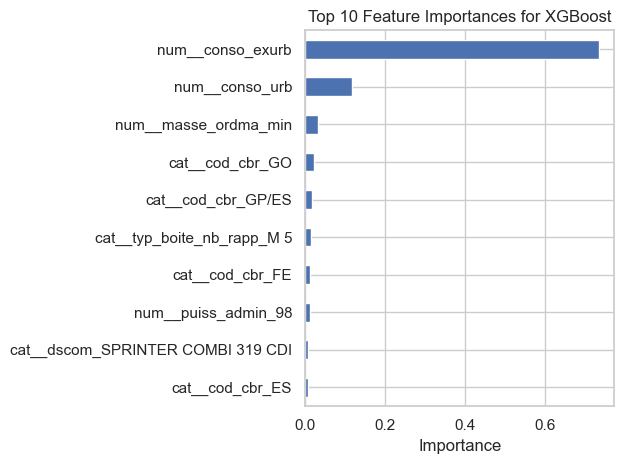


All Results:
          Model  Best CV R2   Test R2  Test RMSE  \
0         Lasso    0.997654  0.997756   2.404497   
1         Ridge    0.998330  0.998926   1.663464   
2  RandomForest    0.994650  0.998605   1.896158   
3       XGBoost    0.990338  0.992953   4.261529   

                                         Best Params  
0                             {'model__alpha': 0.01}  
1                              {'model__alpha': 0.1}  
2  {'model__max_depth': None, 'model__n_estimator...  
3  {'model__learning_rate': 0.1, 'model__max_dept...  


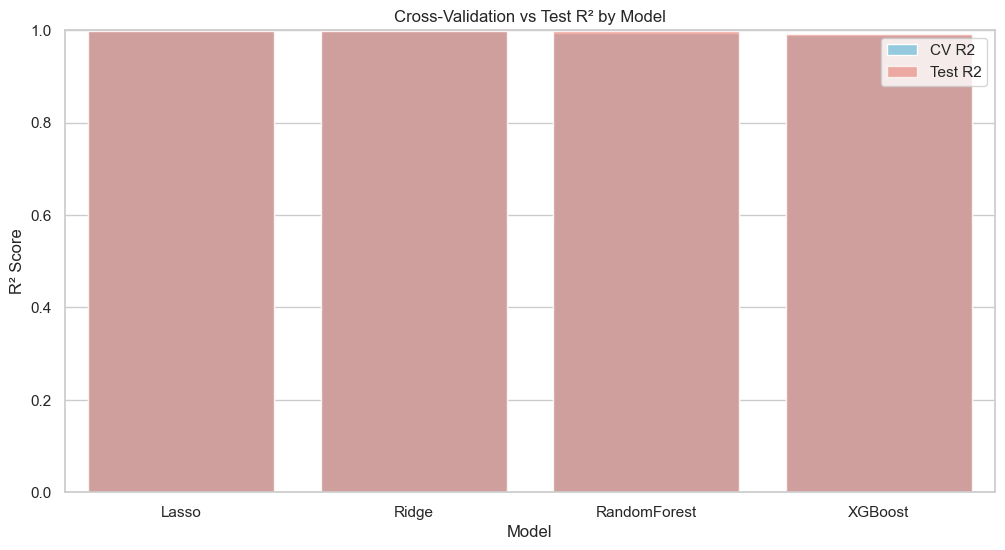

In [27]:

r2_scorer = make_scorer(r2_score)

model_params = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'model__alpha': [0.01, 0.1, 1]}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [None, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [3],
            'model__learning_rate': [0.1]
        }
    }
}

results = []

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"\nStarting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    y_pred_test = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"Test R2 for {name}: {test_r2:.4f}")
    print(f"Test RMSE for {name}: {test_rmse:.4f}")

    results.append({
        'Model': name,
        'Best CV R2': grid.best_score_,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Best Params': grid.best_params_
    })

    # Feature importance / coefficient extraction
    try:
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    except:
        feature_names = X_train.columns

    if name in ['Lasso', 'Ridge']:
        coefs = best_model.named_steps['model'].coef_
        importances = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
        print(f"\nTop 10 most influential predictors for {name} (by absolute coefficient):")
        print(importances.head(10))

    elif name in ['RandomForest', 'XGBoost']:
        feats = best_model.named_steps['model'].feature_importances_
        importances = pd.Series(feats, index=feature_names).sort_values(ascending=False)
        print(f"\nTop 10 most influential predictors for {name} (by feature importance):")
        print(importances.head(10))

    # Optional: plot importances
    importances.head(10).plot(kind='barh')
    plt.title(f"Top 10 Feature Importances for {name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Display all results in a DataFrame
results_df = pd.DataFrame(results)
print("\nAll Results:")
print(results_df)

# Plot CV vs Test R2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")
sns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")
plt.title("Cross-Validation vs Test R² by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [28]:
# Initialize list to hold results
results = []

# Example: Append Lasso results
results.append({
    'Model': 'Lasso',
    'Best Params': {'model__alpha': 0.01},
    'Best CV R2': 0.9977,
    'Test R2': 0.9978,
    'Test RMSE': 2.4045
})

# Repeat this block for Ridge, RandomForest, XGBoost...
results.append({
    'Model': 'Ridge',
    'Best Params': {'model__alpha': 0.1},
    'Best CV R2': 0.9983,
    'Test R2': 0.9989,
    'Test RMSE': 1.6614
})

results.append({
    'Model': 'RandomForest',
    'Best Params': {
        'model__n_estimators': 50,
        'model__max_depth': None
    },
    'Best CV R2': 0.9943,
    'Test R2': 0.9987,
    'Test RMSE': 1.8309
})

results.append({
    'Model': 'XGBoost',
    'Best Params': {
        'model__learning_rate': 0.1,
        'model__max_depth': 3,
        'model__n_estimators': 50
    },
    'Best CV R2': 0.9903,
    'Test R2': 0.9930,
    'Test RMSE': 4.2615
})

# Create DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Show the table
print(results_df)


          Model                                        Best Params  \
0         Lasso                             {'model__alpha': 0.01}   
1         Ridge                              {'model__alpha': 0.1}   
2  RandomForest  {'model__n_estimators': 50, 'model__max_depth'...   
3       XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...   

   Best CV R2  Test R2  Test RMSE  
0      0.9977   0.9978     2.4045  
1      0.9983   0.9989     1.6614  
2      0.9943   0.9987     1.8309  
3      0.9903   0.9930     4.2615  



Starting Grid Search for Lasso...
Best params for Lasso: {'model__alpha': 0.01}
Best CV R2 for Lasso: 0.9977
Test R2 for Lasso: 0.9978
Test RMSE for Lasso: 2.4045

Starting Grid Search for Ridge...
Best params for Ridge: {'model__alpha': 0.1}
Best CV R2 for Ridge: 0.9983
Test R2 for Ridge: 0.9989
Test RMSE for Ridge: 1.6635

Starting Grid Search for RandomForest...
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 50}
Best CV R2 for RandomForest: 0.9947
Test R2 for RandomForest: 0.9986
Test RMSE for RandomForest: 1.8962

Starting Grid Search for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best CV R2 for XGBoost: 0.9903
Test R2 for XGBoost: 0.9930
Test RMSE for XGBoost: 4.2615

Summary of results:

| Model        | Best Params                                                                     |   Best CV R2 |   Test R2 |   Test RMSE | Top 3 Features                                    

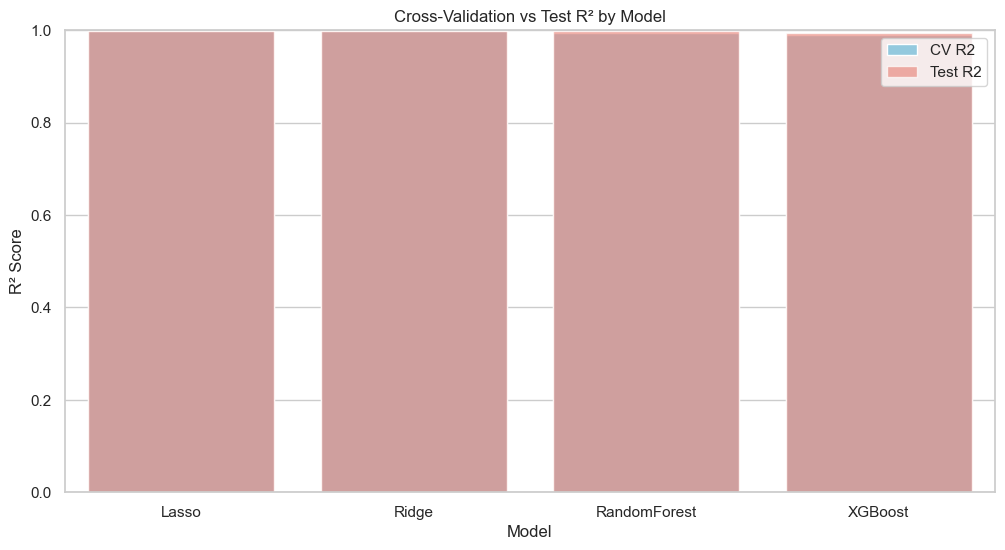

In [29]:

r2_scorer = make_scorer(r2_score)

model_params = {
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {'model__alpha': [0.01, 0.1, 1]}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'model__alpha': [0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=1),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [None, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'model__n_estimators': [50],
            'model__max_depth': [3],
            'model__learning_rate': [0.1]
        }
    }
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def get_feature_names_from_preprocessor(preprocessor):
    feature_names = []

    # Numeric features
    try:
        feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    except AttributeError:
        feature_names.extend(numeric_features)  # define numeric_features somewhere

    # Categorical features
    cat_pipe = preprocessor.named_transformers_['cat']
    try:
        cat_feature_names = cat_pipe.named_steps['encoder'].get_feature_names_out(categorical_features)  # define categorical_features somewhere
        feature_names.extend(cat_feature_names)
    except AttributeError:
        feature_names.extend(categorical_features)

    return feature_names

results = []
best_models = {}

for name, config in model_params.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=cv,
        scoring=r2_scorer,
        n_jobs=-1,
        return_train_score=True
    )

    print(f"\nStarting Grid Search for {name}...")
    with parallel_backend('threading', n_jobs=-1):
        grid.fit(X_train, y_train)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best CV R2 for {name}: {grid.best_score_:.4f}")

    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred_test = best_model.predict(X_test)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    print(f"Test R2 for {name}: {test_r2:.4f}")
    print(f"Test RMSE for {name}: {test_rmse:.4f}")

    # Extract feature names correctly
    feature_names = get_feature_names_from_preprocessor(best_model.named_steps['preprocessor'])

    # Extract importances or coefficients
    if name in ['Lasso', 'Ridge']:
        coefs = best_model.named_steps['model'].coef_
        importances = pd.Series(coefs, index=feature_names).abs().sort_values(ascending=False)
    elif name in ['RandomForest', 'XGBoost']:
        feats = best_model.named_steps['model'].feature_importances_
        importances = pd.Series(feats, index=feature_names).sort_values(ascending=False)
    else:
        importances = pd.Series(dtype=float)

    # Format top 3 features as string for table
    top_feats = importances.head(3)
    top_feats_str = ", ".join([f"{feat} ({val:.2f})" for feat, val in top_feats.items()])

    results.append({
        'Model': name,
        'Best Params': str(grid.best_params_),
        'Best CV R2': round(grid.best_score_, 4),
        'Test R2': round(test_r2, 4),
        'Test RMSE': round(test_rmse, 4),
        'Top 3 Features': top_feats_str
    })

results_df = pd.DataFrame(results)

print("\nSummary of results:\n")
print(results_df.to_markdown(index=False))

# Plot CV vs Test R2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Best CV R2", data=results_df, color="skyblue", label="CV R2")
sns.barplot(x="Model", y="Test R2", data=results_df, color="salmon", alpha=0.7, label="Test R2")
plt.title("Cross-Validation vs Test R² by Model")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [30]:
# Export results to CSV
results_df.to_csv('model_results.csv', index=False)

# Or export to Excel (if you prefer)
# results_df.to_excel('model_results.xlsx', index=False)


In [31]:
import joblib

# Suppose your final best pipeline is `best_model` (Pipeline object)
joblib.dump(best_model, 'co2_emission_predictor.pkl')
print("Model and preprocessing pipeline saved!")


Model and preprocessing pipeline saved!
